In [1]:
# misc collection of plots for ONE-P PHOTOSTIM EXPERIMENTS
import sys
sys.path.extend(['/home/pshah/Documents/code/PackerLab_pycharm', '/home/pshah/Documents/code/PackerLab_pycharm'])

import numpy as np
import matplotlib.pyplot as plt
import alloptical_utils_pj as aoutils
import alloptical_plotting_utils as aoplot
from funcsforprajay import funcs as pj

# import onePstim superobject that will collect analyses from various individual experiments
results_object_path = '/home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl'
onePresults = aoutils.import_resultsobj(pkl_path=results_object_path)



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/alloptical_results_superobject.pkl ... 
|-DONE IMPORT of <class 'alloptical_utils_pj.AllOpticalResults'> resultsobj 



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl ... 
|-DONE IMPORT of <class 'alloptical_utils_pj.OnePhotonResults'> resultsobj 




|- Loaded PS17 t-008 (/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/2021-02-02_t-008/2021-02-02_t-008.pkl) .. DONE

plotting function .................... \ 
\- return elements during print_start_end_plot: (<Figure size 1080x1440 with 12 Axes>, <AxesSubplot:title={'center':'Average trace of stims 1p photostim, pre 4ap PS17 t-008'}, xlabel='Time (secs)', ylabel='dff'>, ([array([ 6.98742868e-03,  1.06891606e-03, -4.92359635e-03, -3.77631602e-03,
        9.71124058e-03,  6.44274868e-03,  4.54798162e-03,  4.44174265e-03,
       -9.30061418e-03, -3.59270731e-03, -7.87875256e-03, -2.80872885e-03,
       -9.19343005e-04, -2.81124828e-03,  6.12370056e+00, -9.82985428e-01,
       -9.83934700e-01, -9.84098956e-01, -4.03482477e-01,  2.69670773e-01,
        2.22002671e-01,  1.71685458e-01,  1.43238421e-01,  1.04817111e-01,
        7.51840814e-02,  4.13682182e-02,  2.06104572e-02,  4.37423669e-03,
       -2.42909005e-02, -3.59233591e-02, -4.42005898e-02, -4.16456712e-02,
       -5.33514824e-02, -5.

ValueError: not enough values to unpack (expected 5, got 3)

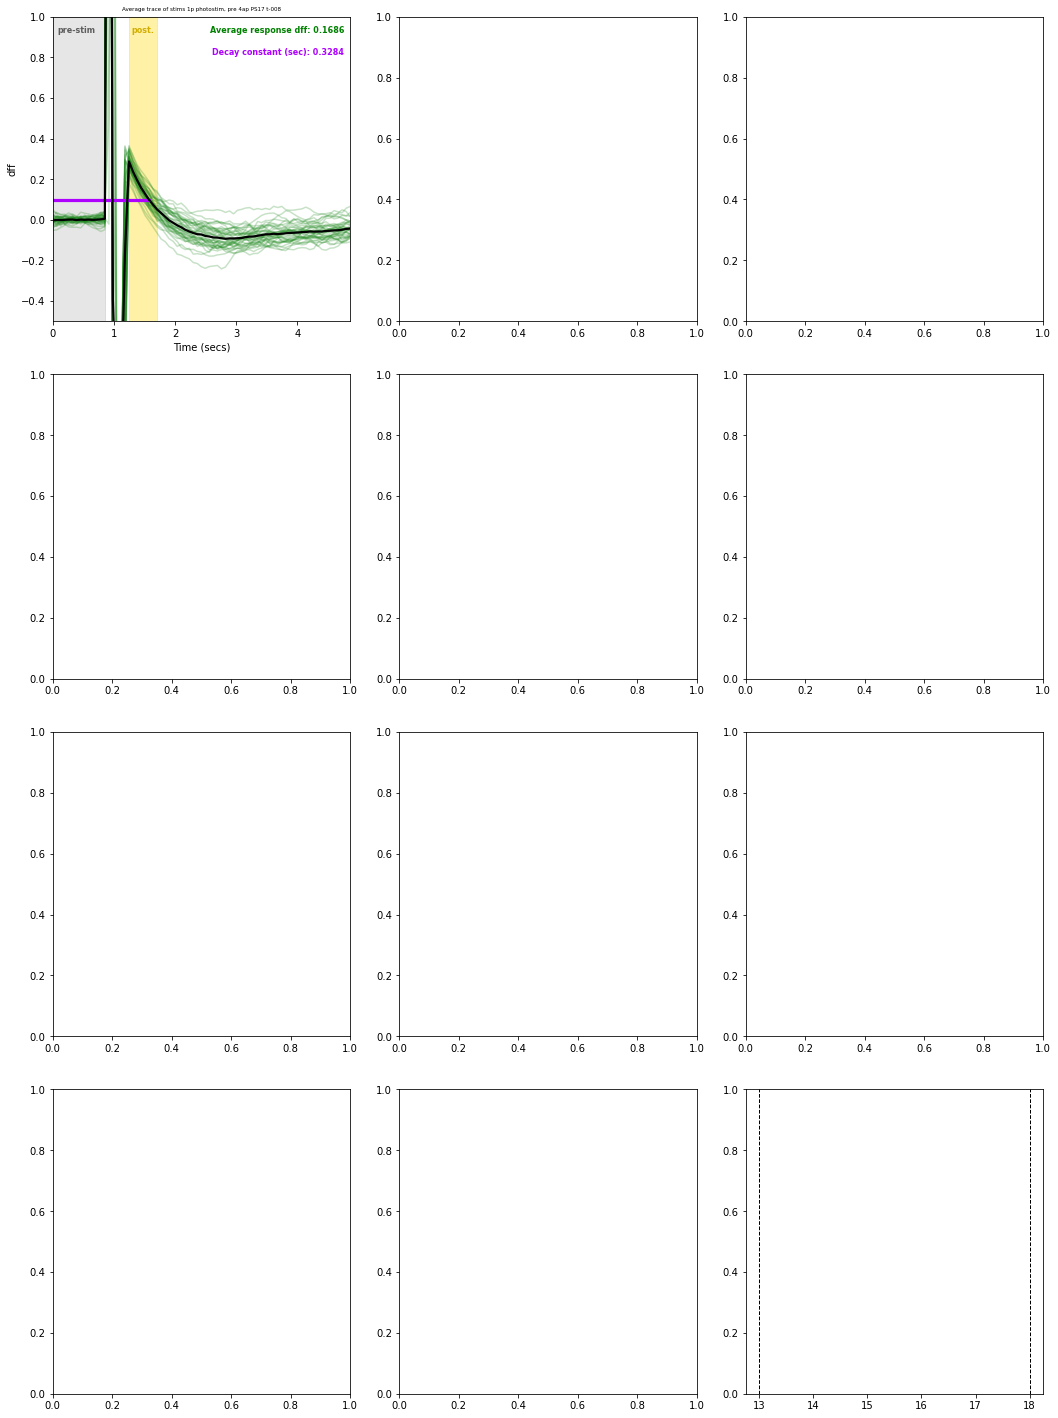

In [3]:
# %% ## collection plots of many trials sub divided as specified - avg flu trace 1p stim plots
# pre-4ap trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text=True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'pre-4ap response'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        fig, ax, flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True,
                                                                                            show=False, fig=fig, ax=ax, write_full_text=write_full_text, shrink_text=1.25)
        # fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim_sec=0.25, post_stim_sec=0.75, optoloopback=True, show=False)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Pre-4ap trials only, avg flu trace for 1p stim', y=0.995)
fig.show()


# post-4ap stims out of sz trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text=True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (outside sz)'])[0] != '-':
        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        title = 'Avg. trace - stims out of sz -'

        fig, ax, flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True,
                                                                                            show=False, fig=fig, ax=ax, write_full_text=write_full_text, shrink_text=1.25, stims_to_analyze=expobj.stims_out_sz,
                                                                                            title=title)
        # fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim_sec=0.25, post_stim_sec=0.75, optoloopback=True, show=False)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Post-4ap trials, stims out of sz, avg flu trace for 1p stim', y=0.995)
fig.show()



# post-4ap stims during sz trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text = True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (during sz)'])[0] != '-':
        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        title = 'Avg. trace - stims in sz -'

        flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True,
                                                                                            show=False, fig=fig, ax=ax, write_full_text=write_full_text, shrink_text=1.25, stims_to_analyze=expobj.stims_in_sz,
                                                                                            title=title)
        # fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim_sec=0.25, post_stim_sec=0.75, optoloopback=True, show=False)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Post-4ap trials, stims in sz, avg flu trace for 1p stim', y=0.995)
fig.show()

In [ ]:
# %% ## avg LFP trace 1p stim plots
# pre-4ap trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text=True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'pre-4ap response'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, show=False, fig=fig, ax=ax,
                                                   write_full_text=write_full_text)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Pre-4ap trials only, avg LFP trace for 1p stim', y=0.995)
fig.show()


# post-4ap stims out of sz trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text=True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (outside sz)'])[0] != '-':
        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path)
        ax = axs[counter//ncols, counter % ncols]

        title = 'Avg. trace - stims out of sz -'

        fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, show=False, fig=fig, ax=ax,
                                                   write_full_text=write_full_text, stims_to_analyze=expobj.stims_out_sz)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Post-4ap trials, stims out of sz, avg LFP trace for 1p stim', y=0.995)
fig.show()



# post-4ap stims during sz trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text = True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (during sz)'])[0] != '-':
        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        title = 'Avg. trace - stims in sz -'

        fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, show=False, fig=fig, ax=ax,
                                                   write_full_text=write_full_text, stims_to_analyze=expobj.stims_in_sz)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Post-4ap trials, stims in sz, avg LFP trace for 1p stim', y=0.995)
fig.show()

In [ ]:
# %% ## LFP + stims plots
# aoplot.plot_lfp_stims(expobj, x_axis='time', figsize=[30, 3], sz_markings=True)


# Mean Raw Flu whole trace plots
nrows = 21
ncols = 1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 15, nrows * 3))
counter = 0
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
    ax = axs[counter]

    fig, ax = aoplot.plotMeanRawFluTrace(expobj, stim_span_color='lightgrey', x_axis='time', title='raw Flu trace, stims shown - ',
                                         show=False, fig=fig, ax=ax, stim_lines=False)

    counter += 1
fig.suptitle('All trials, 1p photostim experiments', y=0.995)
fig.show()

In [ ]:
# %% ## ADD DECAY CONSTANTS TO THE mean_stim_responses dataframe

# pre-4ap trials
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'pre-4ap response'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path)

        flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', y_axis='dff', show=False, quantify=True)
        onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses[
                                                'pkl_list'] == expobj.pkl_path, 'Decay constant pre-4ap (secs.)'] = decay_constant




# post-4ap stims out of sz trials
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (outside sz)'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path)

        flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', y_axis='dff', stims_to_analyze=expobj.stims_out_sz, show=False, quantify=True)
        onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses[
                                                'pkl_list'] == expobj.pkl_path, 'Decay constant post-4ap outside sz (secs.)'] = decay_constant



# post-4ap stims during sz trials
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (during sz)'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path)

        flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', y_axis='dff', stims_to_analyze=expobj.stims_in_sz, show=False, quantify=True)
        onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses[
                                                'pkl_list'] == expobj.pkl_path, 'Decay constant post-4ap during sz (secs.)'] = decay_constant
onePresults.save()

In [ ]:
# %% BAR PLOT OF RESPONSE MAGNITUDE FOR 1P STIM EXPERIMENTS

data = [[rp for rp in onePresults.mean_stim_responses.iloc[:, 1] if rp != '-']]
data.append([rp for rp in onePresults.mean_stim_responses.iloc[:,2] if rp != '-'])
# data.append([rp for rp in onePresults.mean_stim_responses.iloc[:,3] if rp != '-'])

fig, ax = plt.subplots(figsize=[3, 5])
pj.plot_bar_with_points(data=data, title='response magnitudes - 1p stim experiments', x_tick_labels=['pre-4ap', 'post-4ap'],
                        points=True, bar=False, colors=['black', 'green', 'purple'], fig=fig, ax=ax, show=False,
                        x_label='experiment groups', y_label='Avg. dFF (across all stim trials)', alpha=0.4,
                        expand_size_x=0.5, expand_size_y=1.3, shrink_text=1.35)
save_path = '/home/pshah/mnt/qnap/Analysis/' + 'onePstim_response_quant'
print('saving fig to: ', save_path)
fig.savefig(fname=save_path + '.png', transparent=True, format='png')
fig.savefig(fname=save_path + '.svg', transparent=True, format='svg')


In [ ]:
# %% BAR PLOT OF DECAY CONSTANT FOR 1P STIM EXPERIMENTS

data = [list(onePresults.mean_stim_responses[onePresults.mean_stim_responses.iloc[:, -3].notnull()].iloc[:, -3])]
data.append(list(onePresults.mean_stim_responses[onePresults.mean_stim_responses.iloc[:, -2].notnull()].iloc[:, -2]))
# data.append(ls(onePresults.mean_stim_responses[onePresults.mean_stim_responses.iloc[:, -1].notnull()].iloc[:, -1]))

fig, ax = plt.subplots(figsize=[3, 5])
pj.plot_bar_with_points(data=data, title='decay constants - 1p stim experiments', legend_labels=list(onePresults.mean_stim_responses.columns[-3:]),
                        points=True, bar=False, colors=['black', 'green', 'purple'], fig=fig, ax=ax, show=False,
                        x_label='experiment groups', y_label='Avg. Decay constant (secs.)', alpha=0.4,
                        expand_size_x=0.9, expand_size_y=1.2, shrink_text=1.35)
save_path = '/home/pshah/mnt/qnap/Analysis/' + 'onePstim_decay_quant'
print('saving fig to: ', save_path)
fig.savefig(fname=save_path + '.png', transparent=True, format='png')
fig.savefig(fname=save_path + '.svg', transparent=True, format='svg')
